In [2]:
# explore dataset



In [3]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
target_df = pd.read_csv('data/csv_files/train/train_base.csv', nrows=50000)

In [5]:
df = pd.read_csv('data/csv_files/train/train_static_0_0.csv', nrows=50000)

C:\Users\salma\AppData\Local\Temp\ipykernel_3388\2055826896.py:1: DtypeWarning: Columns (45,53,57,84,143,146,167) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/csv_files/train/train_static_0_0.csv', nrows=50000)


In [6]:
# drop columns that are objects

df = df.select_dtypes(include=['float64'])

df.dtypes

actualdpdtolerance_344P           float64
amtinstpaidbefduel24m_4187115A    float64
annuity_780A                      float64
annuitynextmonth_57A              float64
applicationcnt_361L               float64
                                   ...   
sumoutstandtotal_3546847A         float64
sumoutstandtotalest_4493215A      float64
totaldebt_9A                      float64
totalsettled_863A                 float64
totinstallast1m_4525188A          float64
Length: 129, dtype: object

In [7]:
# heat map
# to see which columns have the most effect on our target value

In [8]:
target_df = target_df[['case_id', 'target']]
target_df 

,case_id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
49995,49995,0
49996,49996,0
49997,49997,0
49998,49998,0


In [9]:
df

,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,...,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A
0,NaN,NaN,1917.6000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.00,NaN
1,NaN,NaN,3134.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.00,NaN
2,NaN,NaN,4937.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.00,NaN
3,NaN,NaN,4643.6000,0.0,0.0,1.0,0.0,2.0,0.0,1.0,...,0.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0.00,NaN
4,NaN,NaN,3390.2000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,NaN,3829.4001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,46541.61,NaN
49996,0.0,NaN,6347.0000,0.0,0.0,2.0,56.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,20240.00,NaN
49997,0.0,NaN,4605.6000,4061.0,0.0,0.0,20.0,0.0,0.0,17.0,...,0.0,0.0,0.0,1.0,8.0,32967.6,NaN,32967.6,192273.67,NaN
49998,0.0,NaN,3724.2000,0.0,0.0,0.0,0.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,6.0,0.0,NaN,0.0,287762.66,NaN


In [10]:
# merge the two dataframes

df = df.join(target_df)

In [11]:
# drop case_id
df = df.drop('case_id', axis=1)

# Summary Statistics

In [12]:
df.describe()

,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,...,posfstqpd30lastmonth_3976962P,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,target
count,13742.000000,1037.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,44724.000000,8662.000000,50000.000000,50000.000000,10775.000000,514.000000,50000.000000,5.000000e+04,344.000000,50000.000000
mean,0.012735,22524.586507,4802.039335,632.480229,0.000160,0.149920,0.740600,1.743840,0.435520,1.607800,...,0.033405,1040.822721,0.109180,0.780200,48034.093796,6260.928332,10271.499054,3.224364e+04,18169.685208,0.034860
std,0.832040,32954.424647,2789.859120,2034.819310,0.018973,0.495307,3.430065,13.112581,3.264686,3.389048,...,0.179693,7267.464001,0.367563,1.452932,76838.624744,27849.679206,40669.908116,9.916789e+04,32357.465805,0.183427
min,0.000000,0.000000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,141.042000,0.000000
25%,0.000000,5613.600000,2718.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3195.000025,0.000000
50%,0.000000,11403.402000,4308.800300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9454.200000,0.000000,0.000000,0.000000e+00,6596.400000,0.000000
75%,0.000000,22716.000000,6206.800300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,64085.001000,0.000000,0.000000,0.000000e+00,15485.400000,0.000000
max,95.000000,265398.400000,39823.800000,25661.800000,3.000000,16.000000,238.000000,227.000000,64.000000,64.000000,...,1.000000,209400.000000,5.000000,21.000000,668703.800000,360278.220000,668703.800000,2.062948e+06,253935.610000,1.000000


# Highest correlated columns

In [23]:
# the correlation matrix
correlation_matrix = df.corr()

# want to find columns that are highly correlated to the target column
column_of_interest = 'target'

# extract correlations with the specific column
specific_corr = correlation_matrix[column_of_interest].drop(column_of_interest, axis=0)

# filter for high negative or positive correlations
high_corr_with_specific = specific_corr[abs(specific_corr) > 0.05].sort_values()

print("Columns highly correlated with", column_of_interest, ":\n", high_corr_with_specific)


Columns highly correlated with target :
 lastotherinc_902A                -0.106775
maxpmtlast3m_4525190A            -0.069024
totinstallast1m_4525188A         -0.066301
avgpmtlast12m_4525200A           -0.058366
numinstregularpaidest_4493210L    0.051785
clientscnt_136L                   0.054050
numinstpaid_4499208L              0.054780
maxdbddpdtollast6m_4187119P       0.056802
sumoutstandtotalest_4493215A      0.068952
numinsttopaygrest_4493213L        0.146297
numinstunpaidmaxest_4493212L      0.151863
lastotherlnsexpense_631A          0.267320
Name: target, dtype: float64


In [14]:
# All columns with high correlation to the target value as a list
high_corr_columns = high_corr_with_specific.index.tolist()
high_corr_columns

['lastotherlnsexpense_631A',
 'numinstunpaidmaxest_4493212L',
 'numinsttopaygrest_4493213L',
 'sumoutstandtotalest_4493215A',
 'maxdbddpdtollast6m_4187119P',
 'numinstpaid_4499208L',
 'clientscnt_136L',
 'numinstregularpaidest_4493210L',
 'avgpmtlast12m_4525200A',
 'totinstallast1m_4525188A',
 'maxpmtlast3m_4525190A',
 'lastotherinc_902A']

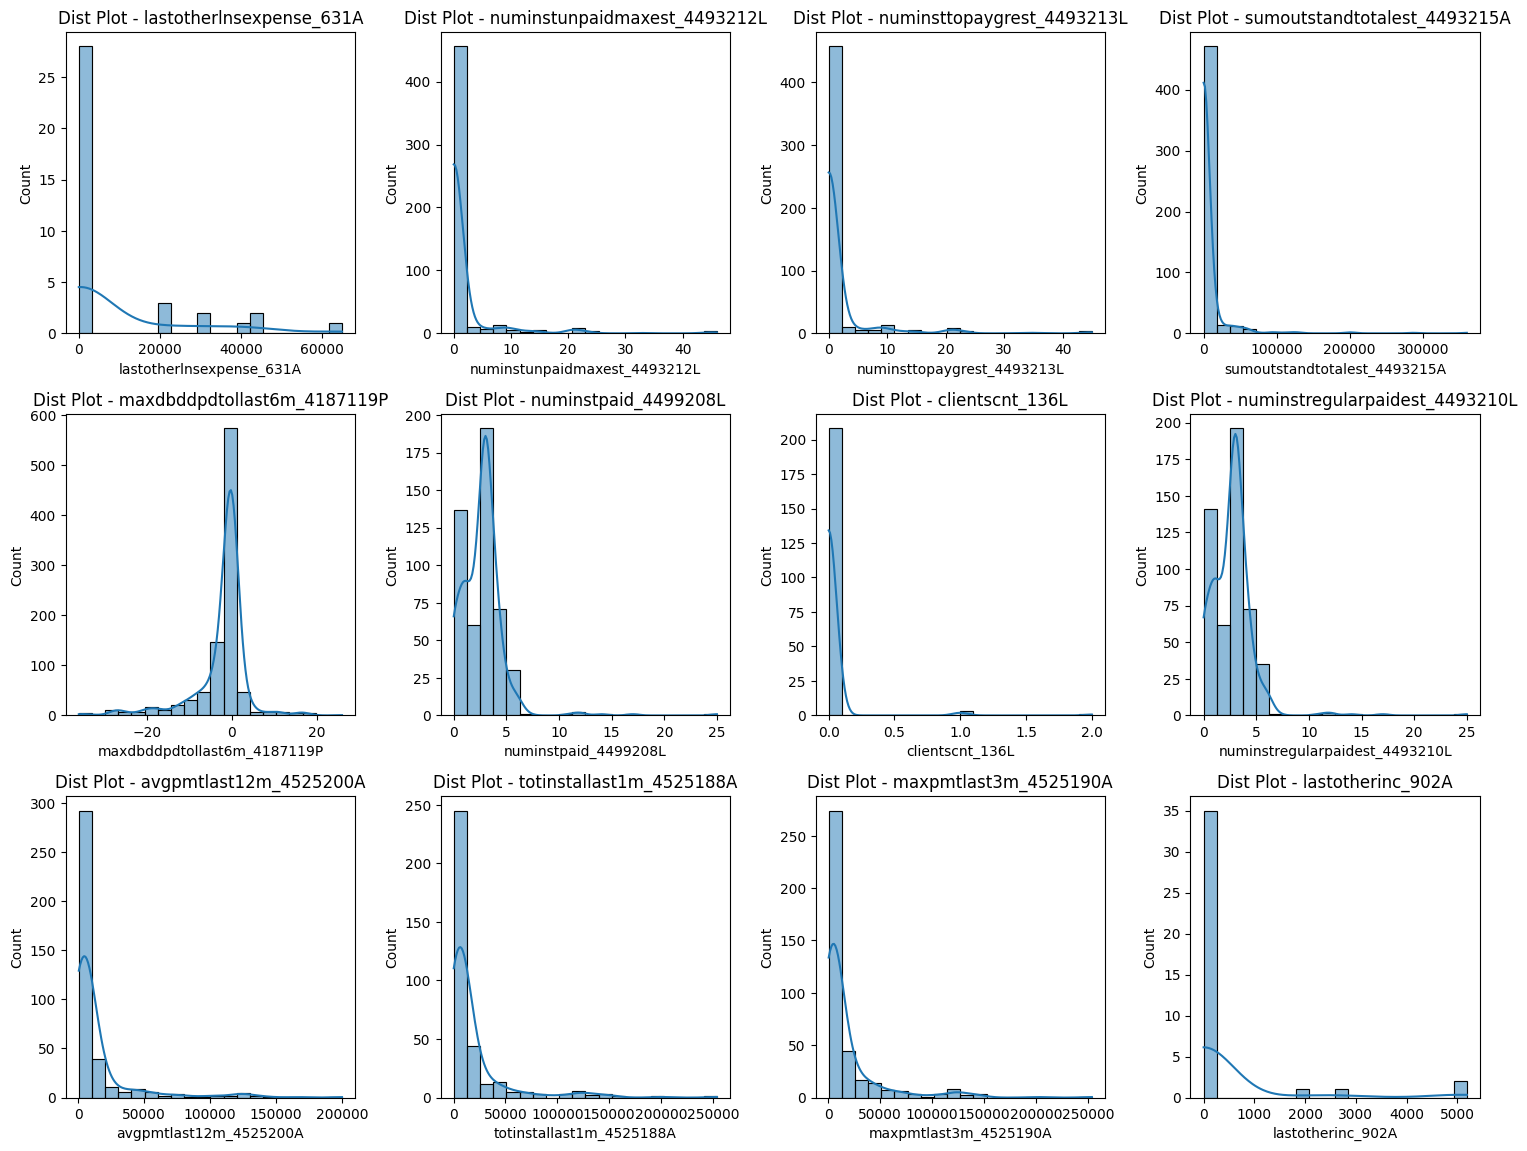

In [17]:
plt.figure(figsize=(15, 15))

# distribution plots for each interest
for i, column in enumerate(df[high_corr_columns].columns):
    # 4x4 grid
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=df[column], kde=True, bins=20)
    plt.title(f'Dist Plot - {column}')

# adjusting layout
plt.tight_layout()
plt.show()

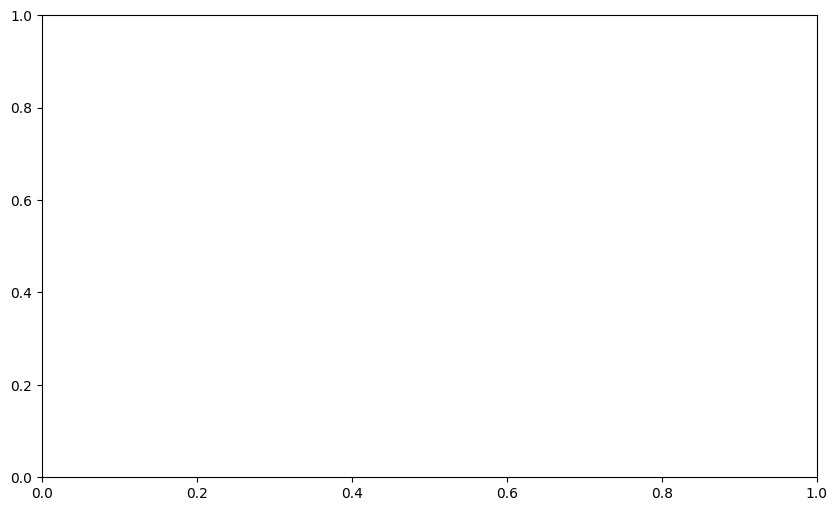

In [22]:
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=df, x='lastotherlnsexpense_631A', y='numinstunpaidmaxest_4493212L', hue='target')
plt.show()

In [15]:
# visualize heatmap

